In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir='C:\Users\Lenovo\Desktop\Parasitized'
data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,batch_size=10,image_size=(224,224))

Found 1000 files belonging to 2 classes.


In [3]:
class_names=data.class_names
print(class_names)

['Parasitized', 'Uninfected']


In [4]:
num_batch=tf.data.experimental.cardinality(data)
print(num_batch)

tf.Tensor(100, shape=(), dtype=int64)


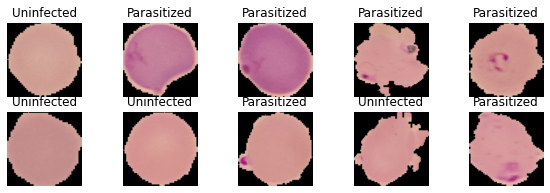

In [5]:
image_batch,label_batch=next(iter(data))
#print(image_batch)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(image_batch[i]/255)
    plt.axis('off')
    plt.title(class_names[label_batch[i]])
    

In [6]:

test_ds=data.take(2) 
train_ds=data.skip(2) 
print('Test Batch=',tf.data.experimental.cardinality(test_ds).numpy())
print('Train Batch=',tf.data.experimental.cardinality(train_ds).numpy())

Test Batch= 2
Train Batch= 98


In [7]:
img=[]
label=[]
for image_batch,label_batch in data:
    img.append(image_batch)
    label.append(label_batch)
import numpy as np
x_data=np.concatenate(img)
x_target=np.concatenate(label)
print(x_data.shape)
print(x_target.shape)

(1000, 224, 224, 3)
(1000,)


In [ ]:
SNetMobile()
model=tf.keras.applications.DenseNet121()
model_fe=tf.keras.Model(inputs=model.inputs,outputs=model.layers[-2].output)
feat=model_fe.predict(x_data)
print(feat.shape)

In [9]:

model=tf.keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False)
inputs=tf.keras.Input(shape=(224,224,3))
x=model(inputs,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x) 
x=tf.keras.layers.Dense(100)(x)
outputs=tf.keras.layers.Dense(100)(x)
new_model=tf.keras.Model(inputs,outputs)
feat=new_model.predict(x_data)
print(feat.shape)

(1000, 100)


In [11]:
import pandas as pd
pd.DataFrame(feat).to_csv('MobileNetV2121_inputs.csv',index=False)
pd.DataFrame(x_target).to_csv('MobileNetV2121_labels.csv',index=False)
print('File written ...')

File written ...


In [12]:

x=pd.read_csv('MobileNetV2121_inputs.csv')
y=pd.read_csv('MobileNetV2121_labels.csv')
print(x.shape)
print(x.head())

(1000, 100)
          0          1         2         3         4         5         6  \
0  0.545805  -0.794582  1.343010 -1.612893 -2.085449 -0.831381 -0.359167   
1  5.167518 -13.435499 -3.659296  3.405384 -0.586763 -9.484508  2.480328   
2  4.758045  -7.676667 -3.028866  3.100527 -0.441778 -3.662572  0.330788   
3  1.892579  -2.802410 -0.359475  0.307679 -1.179312 -1.975681 -0.011812   
4  0.170935   0.483095  0.644740 -0.052896 -2.517482 -4.415863  0.263236   

          7         8         9  ...        90        91        92        93  \
0  0.812626  1.599978  0.812824  ...  2.540242 -2.122436 -2.803358 -0.148296   
1  6.624439 -1.993158 -7.844397  ...  6.432070 -4.530219 -6.270664 -0.706591   
2  3.860754  0.621387 -4.425182  ...  5.159660 -1.976198 -6.023316  0.943390   
3  1.215663 -0.041801 -0.861103  ...  3.334874 -2.532009 -3.364604  0.852751   
4  1.128983  2.123616 -1.170937  ...  1.277991 -3.579679 -1.668582 -0.941580   

         94        95        96        97        9

In [14]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)
# ACcuracy 
from sklearn.metrics import accuracy_score
print('Training acc=',100*accuracy_score(y_pred_train,y_train))
print('Testing acc=',100*accuracy_score(y_pred_test,y_test))

c:\users\ashok\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training acc= 80.875
Testing acc= 80.5


In [15]:
y_target=y_test.values.flatten()
print(y_target)
print(y_pred_test)

[1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1]
[1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1]


In [16]:
print('NUmber of mis cl',(y_target!=y_pred_test).sum())
l=y_target!=y_pred_test
df=pd.DataFrame(y_target)
print('NUmber of mis samples are',df.iloc[l].index)
print('NUmber of mis samples are',df.iloc[l].values.flatten())

NUmber of mis cl 39
NUmber of mis samples are Int64Index([  9,  13,  15,  20,  21,  26,  36,  38,  50,  54,  63,  67,  69,
             73,  75,  77,  80,  84,  90,  94,  96,  99, 103, 104, 110, 112,
            116, 118, 121, 128, 141, 142, 147, 148, 151, 153, 166, 189, 191],
           dtype='int64')
NUmber of mis samples are [0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0]
